In [2]:
import math as m
import random
import csv

l1 = l2 = l3 = 2

def twoLinkAngleCal(x,y):
    try :
        a2 = m.degrees(m.acos((x**2 + y**2 - l1**2 - l2**2) / (2*l1*l2)))
        alpha = m.degrees(m.atan(y/x))
        beta = m.degrees(m.asin(l2 * m.sin(a2) / m.sqrt(x**2 + y**2)))
        a1 = alpha - beta
        return round(a1,2), round(a2,2)
    except Exception:
        pass

def threeLinkAngleCal(x,y,orn):
    try:
        x1 = x - l3*m.cos(orn)
        y1 = y - l3*m.cos(orn)
        a1, a2 = twoLinkAngleCal(x1,y1)
        a3 = orn - (a1 + a2)
        return round(a1,2), round(a2,2), round(a3,2)
    except Exception:
        pass

def threeLinkManipulatorFile():
    with open('threeLinkManipulator.csv', 'w') as csvFile:
        row = ['x','y','orentation','a1','a2', 'a3']
        csv.writer(csvFile).writerow(row)
        for i in range(1, 301):
            x = round(random.uniform(-6, 7),2)
            y = round(random.uniform(-6, 7),2)
            orn = random.randint(0, 2*180)
            sqr = m.sqrt(x**2 + y**2)
            if((abs(l1-l2) <= sqr <= abs(l1+l2)) and (-sqr <= l2 <= sqr)):
                try:
                    a1, a2, a3 = threeLinkAngleCal(x,y,orn)
                    row = [x,y,orn,a1,a2,a3]
                    csv.writer(csvFile).writerow(row)
                except Exception:
                    pass
    csvFile.close()

def twoLinkManipulatorFile():
    with open('twoLinkManipulator.csv', 'w') as csvFile:
        row = ['x','y','','a1','a2']
        csv.writer(csvFile).writerow(row)
        for i in range(1, 201):
            x = round(random.uniform(-6.0, 7.0),2)
            y = round(random.uniform(-6.0, 7.0),2)
            sqr = m.sqrt(x**2 + y**2)
            if((abs(l1-l2) <= sqr <= abs(l1+l2)) and (-sqr <= l2 <= sqr)):
                try : 
                    a1, a2 = twoLinkAngleCal(x,y)
                    row = [x,y,a1,a2]
                    csv.writer(csvFile).writerow(row)
                except Exception:
                    pass
    csvFile.close()

#twoLinkManipulatorFile()
threeLinkManipulatorFile()
####http://people.csail.mit.edu/bkph/articles/Kinematics_Statics_Dynamics_2.pdf

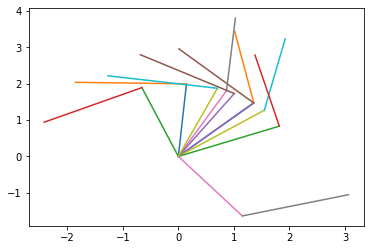

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import imageio as img
import glob,os

plt.figure()

def calculateCoordinate(point, angle, length):
    x, y = point
    ##print("'''''''",point, angle, length,math.sin(math.radians(angle)),math.cos(math.radians(angle)),"''''''''")
    endy = y + length * math.sin(math.radians(angle))
    endx = x + length * math.cos(math.radians(angle))
    ##print(endx,endy)
    
    plt.plot([x, endx], [y, endy])
    return endx,endy
        
l1 = l2 = l3 = 2

filename = 'twoLinkManipulator.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)

x = [row[0] for row in data]
y = [row[1] for row in data]
ang1 = [row[2] for row in data]
ang2 = [row[3] for row in data]

point = [0,0]
c = 1
images = []
for i in range(10):
    fileName = 'Figure/TwoLinkFigure' + str(c) + '.png'
    point = calculateCoordinate([0,0],ang1[i],l1)
    calculateCoordinate(point,ang1[i]+ang2[i],l2)
    plt.savefig(fileName)
    images.append(img.imread(fileName))
    c = c+1

img.mimsave('Figure/animateTwoLink.gif',images) 
import glob, os
for f in glob.glob("Figure/TwoLinkFigure*.png"):
    os.remove(f)

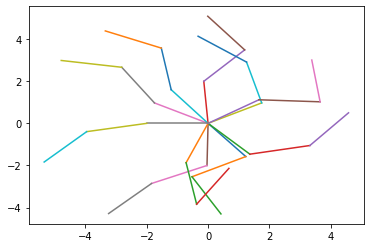

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import imageio as img
import glob,os

def plot_point(point, angle, length):
    x, y = point
    
    endy = y + length * math.sin(math.radians(angle))
    endx = x + length * math.cos(math.radians(angle))
    
    plt.plot([x, endx], [y, endy])
    return endx,endy

        
l1 = l2 = l3 = 2

filename = 'threeLinkManipulator.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)

x = [row[0] for row in data]
y = [row[1] for row in data]
ang1 = [row[2] for row in data]
ang2 = [row[3] for row in data]
ang3 = [row[4] for row in data]

point = [0,0]
c = 1
images = []
for i in range(10):
    fileName = 'Figure/ThreeLinkFigure' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.savefig(fileName)
    images.append(img.imread(fileName))
    c = c+1
    
img.mimsave('Figure/animateThreeLink.gif',images) 
import glob, os
for f in glob.glob("Figure/ThreeLinkFigure*.png"):
    os.remove(f)

In [37]:
import math as m
import random
import csv

l1 = l2 = l3 = 7

def twoLinkAngleCal(x,y):
    #try :
    a2 = m.degrees(m.acos((x**2 + y**2 - l1**2 - l2**2) / (2*l1*l2)))
    print(a2)
    alpha = m.degrees(m.atan(y/x))
    beta = m.degrees(m.asin(l2 * m.sin(a2) / m.sqrt(x**2 + y**2)))
    a1 = alpha - beta
    return round(a1,2), round(a2,2)
    #except Exception:
    #   pass

def threeLinkAngleCal(x,y,orn):
    try:
        x1 = x - l3*m.cos(orn)
        y1 = y - l3*m.cos(orn)
        a1, a2 = twoLinkAngleCal(x1,y1)
        a3 = orn - (a1 + a2)
        return round(a1,2), round(a2,2), round(a3,2)
    except Exception:
        pass
print(twoLinkAngleCal(9.8994949,0))

'''def threeLinkManipulatorFile():
    with open('threeLinkManipulator.csv', 'w') as csvFile:
        row = ['x','y','orentation','a1','a2', 'a3']
        csv.writer(csvFile).writerow(row)
        points=np.linspace(2,10,100)
        for p in points:
            x = 11
            y = p
            orn =round(m.degrees(m.atan(y/x)),2)
            try:
                a1, a2, a3 = threeLinkAngleCal(x,y,orn)
                if(a1>0):
                    row = [x,y,orn,a1,a2,a3]
                    csv.writer(csvFile).writerow(row)
            except:
                pass
                
    csvFile.close()

threeLinkManipulatorFile()
####http://people.csail.mit.edu/bkph/articles/Kinematics_Statics_Dynamics_2.pdf

filename = 'threeLinkManipulator.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[3] for row in data]
ang2 = [row[4] for row in data]
ang3 = [row[5] for row in data]

print(data[0])
point = [0,0]
c = 1
images = []
for i in range(len(data)):
    fileName = 'Figure/ThreeLinkFigure' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.savefig(fileName)
    images.append(img.imread(fileName))
    c = c+1
    
img.mimsave('Figure/animateThreeLink.gif',images) 
import glob, os
for f in glob.glob("Figure/ThreeLinkFigure*.png"):
    os.remove(f)'''

90.00000042379816
(-39.21, 90.0)


'def threeLinkManipulatorFile():\n    with open(\'threeLinkManipulator.csv\', \'w\') as csvFile:\n        row = [\'x\',\'y\',\'orentation\',\'a1\',\'a2\', \'a3\']\n        csv.writer(csvFile).writerow(row)\n        points=np.linspace(2,10,100)\n        for p in points:\n            x = 11\n            y = p\n            orn =round(m.degrees(m.atan(y/x)),2)\n            try:\n                a1, a2, a3 = threeLinkAngleCal(x,y,orn)\n                if(a1>0):\n                    row = [x,y,orn,a1,a2,a3]\n                    csv.writer(csvFile).writerow(row)\n            except:\n                pass\n                \n    csvFile.close()\n\nthreeLinkManipulatorFile()\n####http://people.csail.mit.edu/bkph/articles/Kinematics_Statics_Dynamics_2.pdf\n\nfilename = \'threeLinkManipulator.csv\'\ndata = np.loadtxt(filename, delimiter=",", skiprows=1)\n\n\nang1 = [row[3] for row in data]\nang2 = [row[4] for row in data]\nang3 = [row[5] for row in data]\n\nprint(data[0])\npoint = [0,0]\nc = 1\nim

In [26]:
print(m.acos(1))

0.0
